# **Analytical Solution**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0, 10, 101)

In [129]:
import math

In [130]:
#def func(t):
#  return -10*math.exp(-3*t)*math.cos(3*t) -7*math.exp(-3*t)*math.sin(3*t)+10

In [131]:

def func(t):
  return math.exp(-3*t/2)*((-10/37)*math.cos(math.sqrt(11)*t/2) +(-270/(math.sqrt(11)*37))*math.sin(math.sqrt(11)*t/2)) + (10/37)*(math.cos(2*t) +6*math.sin(2*t))

In [132]:
Tsol=[]
for i in t:
    Tsol.append(func(i))

# **USING ODEINT**

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
from scipy.integrate import odeint

In [136]:
def pend(I, t, b, c):
    return np.array([I[1], 10*math.cos(2*t) -b*I[1] - c*I[0]])

In [137]:

b = 3
c = 5
y0 = np.array([0,0])

In [138]:
sol = odeint(pend, y0, t, args=(b, c))

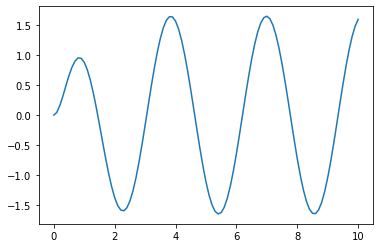

In [139]:
plt.plot(t, sol[:, 0])

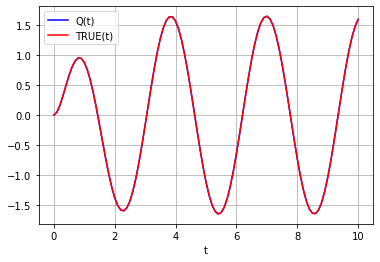

In [140]:
plt.plot(t, sol[:, 0], 'b', label='Q(t)')
#plt.plot(t, sol[:, 1], 'g', label='I(t)')
plt.plot(t, Tsol, 'r', label='TRUE(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# **error**

In [141]:
err=[]
for i in range(len(t)):
  err.append(Tsol[i]-sol[:,0][i])

In [142]:
from tabulate import tabulate

table=[['T','True value','Numerical method value','Error']]
for i in range(len(t)):
  table.append([t[i],Tsol[i],sol[:,0][i],err[i]])


#table = [[t[0],Tsol[0],sol[:,0][0],err[0]],[t[1],Tsol[1],sol[:,0][1],err[1]]]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════╤══════════════╤══════════════════════════╤══════════════╕
│    T │   True value │   Numerical method value │        Error │
╞══════╪══════════════╪══════════════════════════╪══════════════╡
│  0   │   0          │               0          │  0           │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.1 │   0.0450121  │               0.0450121  │ -8.47081e-09 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.2 │   0.160375   │               0.160375   │ -3.33487e-09 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.3 │   0.31775    │               0.31775    │ -5.32497e-09 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.4 │   0.491195   │               0.491195   │ -8.83683e-09 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.5 │   0.65799    │               0.65799    │ -9.94509e-09 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.6 │  

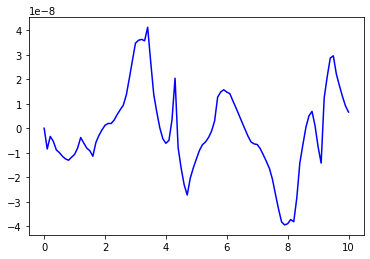

In [143]:
plt.plot(t, err, 'b', label='Q(t)')

In [144]:
SumOfSquare=0
absoluteSum=0
for i in range(len(t)):
  SumOfSquare=SumOfSquare=+ err[i]**2
  absoluteSum=absoluteSum + abs(err[i])


#root mean square error
RMSE=math.sqrt(SumOfSquare)/len(t)

#Mean absolute Error
MAE=absoluteSum/len(t)

print(RMSE)
print(MAE)

6.552547503490991e-11
1.3431390947033232e-08


# **Using RK1 or EULER METHOD**

In [145]:
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y



In [146]:
solrk1 = rungekutta1(pend, y0, t, args=(b, c))

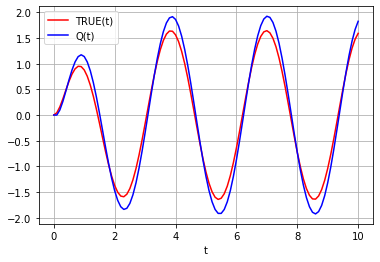

In [147]:

plt.plot(t, Tsol, 'r', label='TRUE(t)')
plt.plot(t, solrk1[:, 0], 'b', label='Q(t)')
#plt.plot(t, solrk1[:, 1], 'g', label='I(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# **error**

In [148]:
err=[]
for i in range(len(t)):
  err.append(Tsol[i]-solrk1[:,0][i])
  


In [149]:
from tabulate import tabulate

table=[['T','True value','Numerical method value','Error']]
for i in range(len(t)):
  table.append([t[i],Tsol[i],solrk1[:,0][i],err[i]])



print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════╤══════════════╤══════════════════════════╤═════════════╕
│    T │   True value │   Numerical method value │       Error │
╞══════╪══════════════╪══════════════════════════╪═════════════╡
│  0   │   0          │                0         │  0          │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.1 │   0.0450121  │                0         │  0.0450121  │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.2 │   0.160375   │                0.1       │  0.0603746  │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.3 │   0.31775    │                0.268007  │  0.0497431  │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.4 │   0.491195   │                0.472717  │  0.0184779  │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.5 │   0.65799    │                0.685148  │ -0.0271584  │
├──────┼──────────────┼──────────────────────────┼─────────────┤
│  0.6 │   0.799217   │  

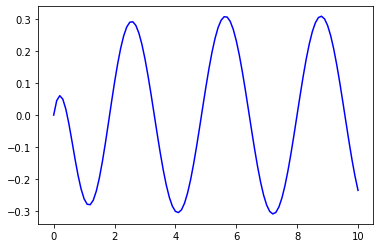

In [150]:
plt.plot(t, err, 'b', label='err')

In [151]:
SumOfSquare=0
absoluteSum=0
for i in range(len(t)):
  SumOfSquare=SumOfSquare=+ err[i]**2
  absoluteSum=absoluteSum + abs(err[i])


#root mean square error
RMSE=math.sqrt(SumOfSquare)/len(t)

#Mean absolute Error
MAE=absoluteSum/len(t)

print(RMSE)
print(MAE)

0.0023231623115292756
0.1805415810222416


# **RK2**

In [152]:
def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return y

In [153]:
#t4 = np.linspace(0, 10, 21)
#solrk2_4 = rungekutta2(pend, y0, t4, args=(b, c))
#t = np.linspace(0, 10, 101)
#solrk2_1 = rungekutta2(pend, y0, t, args=(b, c))
#t2 = np.linspace(0, 10, 1001)
#solrk2_2 = rungekutta2(pend, y0, t2, args=(b, c))
#t3 = np.linspace(0, 10, 10001)
#solrk2_3 = rungekutta2(pend, y0, t3, args=(b, c))

In [154]:

solrk2 = rungekutta2(pend, y0, t, args=(b, c))

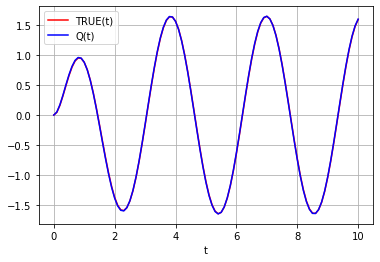

In [155]:
plt.plot(t, Tsol, 'r', label='TRUE(t)')
plt.plot(t, solrk2[:, 0], 'b', label='Q(t)')
#plt.plot(t, solrk2[:, 1], 'g', label='I(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## **error**

In [156]:
err=[]
for i in range(len(t)):
  err.append(Tsol[i]-solrk2[:,0][i])
  


In [157]:
from tabulate import tabulate

table=[['T','True value','Numerical method value','Error']]
for i in range(len(t)):
  table.append([t[i],Tsol[i],solrk2[:,0][i],err[i]])


#table = [[t[0],Tsol[0],sol[:,0][0],err[0]],[t[1],Tsol[1],sol[:,0][1],err[1]]]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════╤══════════════╤══════════════════════════╤══════════════╕
│    T │   True value │   Numerical method value │        Error │
╞══════╪══════════════╪══════════════════════════╪══════════════╡
│  0   │   0          │                0         │  0           │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.1 │   0.0450121  │                0.05      │ -0.0049879   │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.2 │   0.160375   │                0.169579  │ -0.00920413  │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.3 │   0.31775    │                0.330008  │ -0.0122583   │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.4 │   0.491195   │                0.505153  │ -0.0139576   │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.5 │   0.65799    │                0.672259  │ -0.0142691   │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.6 │  

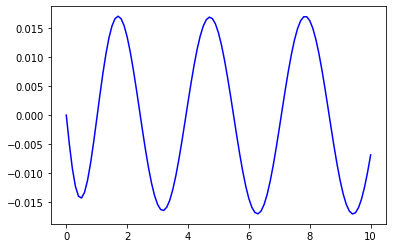

In [158]:
plt.plot(t, err, 'b', label='err')

In [159]:
SumOfSquare=0
absoluteSum=0
for i in range(len(t)):
  SumOfSquare=SumOfSquare=+ err[i]**2
  absoluteSum=absoluteSum + abs(err[i])


#root mean square error
RMSE=math.sqrt(SumOfSquare)/len(t)

#Mean absolute Error
MAE=absoluteSum/len(t)

print(RMSE)
print(MAE)

6.773633528449245e-05
0.010669684938809777


# **RK4**

In [160]:
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [161]:
solrk4 = rungekutta4(pend, y0, t, args=(b, c))

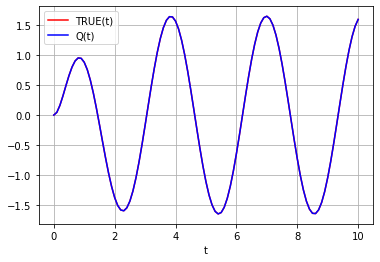

In [162]:
plt.plot(t, Tsol, 'r', label='TRUE(t)')
plt.plot(t, solrk4[:, 0], 'b', label='Q(t)')
#plt.plot(t, solrk4[:, 1], 'g', label='I(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# **error**

In [163]:
err=[]
for i in range(len(t)):
  err.append(Tsol[i]-solrk4[:,0][i])
  
  

In [164]:
from tabulate import tabulate

table=[['T','True value','Numerical method value','Error']]
for i in range(len(t)):
  table.append([t[i],Tsol[i],solrk4[:,0][i],err[i]])


#table = [[t[0],Tsol[0],sol[:,0][0],err[0]],[t[1],Tsol[1],sol[:,0][1],err[1]]]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════╤══════════════╤══════════════════════════╤══════════════╕
│    T │   True value │   Numerical method value │        Error │
╞══════╪══════════════╪══════════════════════════╪══════════════╡
│  0   │   0          │               0          │  0           │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.1 │   0.0450121  │               0.0450126  │ -5.2872e-07  │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.2 │   0.160375   │               0.16038    │ -5.93693e-06 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.3 │   0.31775    │               0.317764   │ -1.45489e-05 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.4 │   0.491195   │               0.49122    │ -2.47751e-05 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.5 │   0.65799    │               0.658025   │ -3.51971e-05 │
├──────┼──────────────┼──────────────────────────┼──────────────┤
│  0.6 │  

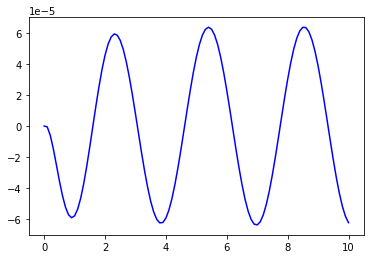

In [165]:
plt.plot(t, err, 'b', label='err')

In [166]:
SumOfSquare=0
absoluteSum=0
for i in range(len(t)):
  SumOfSquare=SumOfSquare=+ err[i]**2
  absoluteSum=absoluteSum + abs(err[i])


#root mean square error
RMSE=math.sqrt(SumOfSquare)/len(t)

#Mean absolute Error
MAE=absoluteSum/len(t)

print(RMSE)
print(MAE)

6.15400560774608e-07
3.8478353957005165e-05
